# Projeto Final de Flora Canabrava

Este notebook foi produzido por Flora Canabrava para o projeto final do *bootcamp* de Análise de Dados com Python da {Reprograma}



*   Turma: On34
*   Ano: 2024




## Coleta dos Dados

Os dados vêm de uma única fonte, estadudinense (Estado de Indiana), [coletada no Kaggle](https:///www.kaggle.com/datasets/jinbonnie/animal-data).

A base de dados, em tradução livre, se chama "Cuidados e Controle de Animais Adotados".

A tabela analisa a situação animal de diversos abrigos coletados e gerenciados pelo *Bloomington Animal Shelter* de 2017-2020.

-----



**O objetivo**

  Analisar a movimentação de gatos nos abrigos (entrada e saída), compreendendo a situação dos abandonos, tempo de permanência no abrigo, motivo de saída do abrigo e verificando se há alguma co-relação com cor e idade.


### Importando as bibliotecas que serão utilizadas no projeto.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Abrindo tabela csv


In [2]:
df_abrigo = pd.read_csv('animais_abrigo.csv')
df_abrigo

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,2017-04-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2017-04-18 00:00:00,Foster,0.0,2018-05-29 00:00:00,Stray,NaN,Died in care,0,0,0
4,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2018-05-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,64584,2019-08-27 16:52:09,Litter relinquishment,0,C19081429,981020029330984,Max,Domestic Medium Hair,Orange and White,Cat,...,2019-08-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10286,64588,2019-08-27 18:14:11,Stray,0,C19081418,981020033133599,Punkin,Domestic Short Hair,Calico,Cat,...,2019-08-28 00:00:00,Foster,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10287,64606,2019-08-29 12:10:21,Stray,0,D19081440,0A1243400C,Dozer,Coonhound,Red,Dog,...,2019-08-29 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0
10288,64608,2019-08-29 18:58:06,Stray,0,D19081421,982000363034690,Lucy Farmer,Beagle,Tricolour,Dog,...,2019-08-30 00:00:00,Reclaimed,0.0,NaN,Stray,NaN,Court Order/ Legal,0,0,0


## Compreendendo e Limpando os dados da tabela

### Compreendendo os dados




In [3]:
# Verificando o tamanho do dataframe

df_abrigo.shape

(10290, 23)

In [4]:
# Verificando informações da tabela

df_abrigo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10290 non-null  int64  
 1   intakedate        10290 non-null  object 
 2   intakereason      10288 non-null  object 
 3   istransfer        10290 non-null  int64  
 4   sheltercode       10290 non-null  object 
 5   identichipnumber  8324 non-null   object 
 6   animalname        10290 non-null  object 
 7   breedname         10245 non-null  object 
 8   basecolour        10290 non-null  object 
 9   speciesname       10290 non-null  object 
 10  animalage         10290 non-null  object 
 11  sexname           10290 non-null  object 
 12  location          10290 non-null  object 
 13  movementdate      10290 non-null  object 
 14  movementtype      10290 non-null  object 
 15  istrial           10289 non-null  float64
 16  returndate        3256 non-null   object

In [5]:
# Contando a quantidade de valores nulos

df_abrigo.isnull().sum()

,0
id,0
intakedate,0
intakereason,2
istransfer,0
sheltercode,0
identichipnumber,1966
animalname,0
breedname,45
basecolour,0
speciesname,0


In [6]:
# Verificando de qual espécie são os dados nulos da coluna "raça (breedname)"

df_filtrado = df_abrigo[df_abrigo['breedname'].isnull()]
df_filtrado[['speciesname', 'breedname']]

,speciesname,breedname
26,Dog,NaN
370,Opossum,NaN
371,Opossum,NaN
372,Opossum,NaN
373,Opossum,NaN
374,Opossum,NaN
387,Chicken,NaN
478,Tortoise,NaN
617,Chicken,NaN
652,Chicken,NaN


<br>
<div class="alert alert-block alert-info">
<b>Dados nulos na coluna "Raça":</b> Como não são da espécie gato, as quais as análises serão focadas, não há necessidade de limpeza dessas linhas.

</div>

In [7]:
# Verificando de qual espécie são os dados nulos da coluna "motivo de entrada (intakereason)"

df_filtrado = df_abrigo[df_abrigo['intakereason'].isnull()]
df_filtrado[['speciesname', 'intakereason', 'basecolour', 'breedname', 'returndate', 'returnedreason']]

,speciesname,intakereason,basecolour,breedname,returndate,returnedreason
127,Cat,NaN,Brown and Black,Domestic Medium Hair,NaN,Stray
157,House Rabbit,NaN,Chocolate,Rex,NaN,Stray


In [8]:
# Preenchendo os dados nulos de "motivo de entrada" para "Não disponível" (Os demais dados serão traduzidos para PT mais a frente)

df_abrigo['intakereason'] = df_abrigo['intakereason'].fillna('Não disponível')


In [9]:
# Confirmando se o preenchimento foi feito corretamente

df_abrigo['intakereason'].isnull().sum()

0

### Limpando os dados

In [10]:
# Convertendo dados 'object' para 'data'

df_abrigo['intakedate'] = pd.to_datetime(df_abrigo['intakedate'])
df_abrigo['movementdate'] = pd.to_datetime(df_abrigo['movementdate'])
df_abrigo['returndate'] = pd.to_datetime(df_abrigo['returndate'])
df_abrigo['deceaseddate'] = pd.to_datetime(df_abrigo['deceaseddate'])

# Verificando informações da tabela

df_abrigo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10290 non-null  int64         
 1   intakedate        10290 non-null  datetime64[ns]
 2   intakereason      10290 non-null  object        
 3   istransfer        10290 non-null  int64         
 4   sheltercode       10290 non-null  object        
 5   identichipnumber  8324 non-null   object        
 6   animalname        10290 non-null  object        
 7   breedname         10245 non-null  object        
 8   basecolour        10290 non-null  object        
 9   speciesname       10290 non-null  object        
 10  animalage         10290 non-null  object        
 11  sexname           10290 non-null  object        
 12  location          10290 non-null  object        
 13  movementdate      10290 non-null  datetime64[ns]
 14  movementtype      1029

In [11]:
# Verificando os valores da coluna "animalage"

df_abrigo['animalage'].unique()

array(['9 years 2 months.', '9 years 1 month.', '6 years 8 months.',
       '8 years 11 months.', '5 years 11 months.', '4 years 6 months.',
       '3 years 2 months.', '12 years 3 months.', '4 years 1 month.',
       '5 years 0 months.', '3 years 10 months.', '3 years 3 months.',
       '1 year 10 months.', '9 years 11 months.', '3 years 4 months.',
       '16 years 3 months.', '13 years 9 months.', '4 years 9 months.',
       '6 years 10 months.', '11 years 9 months.', '3 years 9 months.',
       '2 years 8 months.', '4 years 2 months.', '2 years 10 months.',
       '1 year 11 months.', '6 years 2 months.', '4 years 4 months.',
       '3 years 5 months.', '6 years 9 months.', '8 years 8 months.',
       '4 years 8 months.', '5 years 8 months.', '1 year 9 months.',
       '1 year 8 months.', '3 years 0 months.', '2 years 4 months.',
       '3 years 8 months.', '6 years 11 months.', '5 years 4 months.',
       '3 years 11 months.', '3 years 1 month.', '16 years 8 months.',
       '18 y

In [12]:
# Criando uma função para converter a data

def animalageToYears(idade_str):
  idade = idade_str.replace(' years ','.').replace(' year ','.').replace(' months.','').replace(' month.','').replace(' weeks.', '').replace(' week.', '').replace(' days.', '').replace(' day.', '')
  if 'weeks' in idade_str or 'week' in idade_str:
        semanas = float(idade)
        idade_final = semanas / 52  # Converte semanas para anos

  elif 'days' in idade_str or 'day' in idade_str:
        dias = float(idade)
        idade_final = dias / 365  # Converte dias para anos

  else:
        anos = float(idade) // 1
        meses = float(idade) % 1 * 10
        idade_final = anos + meses / 12  # Converte meses para anos

  return idade_final

In [13]:
# Aplicando função na coluna

df_abrigo['idade (anos)'] = df_abrigo['animalage'].apply(animalageToYears)

df_abrigo[['animalage', 'idade (anos)']]

,animalage,idade (anos)
0,9 years 2 months.,9.166667
1,9 years 1 month.,9.083333
2,6 years 8 months.,6.666667
3,8 years 11 months.,8.091667
4,8 years 11 months.,8.091667
...,...,...
10285,21 weeks.,0.403846
10286,6 weeks.,0.115385
10287,6 years 8 months.,6.666667
10288,7 years 5 months.,7.416667


In [14]:
# Excluindo as colunas que não serão utilizadas (Drop)

columns_drop = ['identichipnumber', 'location', 'istrial', 'animalage']
df_abrigo = df_abrigo.drop(columns_drop, axis=1)
df_abrigo

,id,intakedate,intakereason,istransfer,sheltercode,animalname,breedname,basecolour,speciesname,sexname,movementdate,movementtype,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,idade (anos)
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,Jadzia,Domestic Short Hair,Tortie,Cat,Female,2017-05-13,Adoption,NaT,Stray,NaT,Died in care,0,0,0,9.166667
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,Gonzo,German Shepherd Dog/Mix,Tan,Dog,Male,2017-04-24,Adoption,NaT,Stray,NaT,Died in care,0,0,0,9.083333
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,Maggie,Shep Mix/Siberian Husky,Various,Dog,Female,2017-04-15,Adoption,NaT,Stray,NaT,Died in care,0,0,0,6.666667
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,Female,2017-04-18,Foster,2018-05-29,Stray,NaT,Died in care,0,0,0,8.091667
4,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,Female,2018-05-29,Adoption,NaT,Stray,NaT,Died in care,0,0,0,8.091667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,64584,2019-08-27 16:52:09,Litter relinquishment,0,C19081429,Max,Domestic Medium Hair,Orange and White,Cat,Male,2019-08-29,Adoption,NaT,Stray,NaT,Court Order/ Legal,0,0,0,0.403846
10286,64588,2019-08-27 18:14:11,Stray,0,C19081418,Punkin,Domestic Short Hair,Calico,Cat,Female,2019-08-28,Foster,NaT,Stray,NaT,Court Order/ Legal,0,0,0,0.115385
10287,64606,2019-08-29 12:10:21,Stray,0,D19081440,Dozer,Coonhound,Red,Dog,Male,2019-08-29,Reclaimed,NaT,Stray,NaT,Court Order/ Legal,0,0,0,6.666667
10288,64608,2019-08-29 18:58:06,Stray,0,D19081421,Lucy Farmer,Beagle,Tricolour,Dog,Female,2019-08-30,Reclaimed,NaT,Stray,NaT,Court Order/ Legal,0,0,0,7.416667


### Baixando o dataframe

In [15]:
# Baixando o dataframe limpo do abrigo para CSV

df_abrigo.to_csv('animal_abrigo_final.csv', index=False)

### Traduzindo a tabela para Português (BR)



#### Colunas

In [16]:
# Obtendo o nome das colunas

df_abrigo.columns

Index(['id', 'intakedate', 'intakereason', 'istransfer', 'sheltercode',
       'animalname', 'breedname', 'basecolour', 'speciesname', 'sexname',
       'movementdate', 'movementtype', 'returndate', 'returnedreason',
       'deceaseddate', 'deceasedreason', 'diedoffshelter', 'puttosleep',
       'isdoa', 'idade (anos)'],
      dtype='object')

In [17]:
# Renomeando as colunas

df_abrigo = df_abrigo.rename(columns={
    'id': 'id',
    'intakedate': 'data de entrada',
    'intakereason': 'motivo de entrada',
    'istransfer': 'é transferência',
    'sheltercode': 'código do abrigo',
    'animalname': 'nome do animal',
    'breedname': 'nome da raça',
    'basecolour': 'cor base',
    'speciesname': 'nome da espécie',
    'sexname': 'sexo',
    'movementdate': 'data de movimentação',
    'movementtype': 'tipo de movimentação',
    'returndate': 'data de retorno',
    'returnedreason': 'motivo de retorno',
    'deceaseddate': 'data de falecimento',
    'deceasedreason': 'motivo de falecimento',
    'diedoffshelter': 'morreu fora do abrigo',
    'puttosleep': 'foi sacrificado',
    'isdoa': 'é DOA'
})

df_abrigo

,id,data de entrada,motivo de entrada,é transferência,código do abrigo,nome do animal,nome da raça,cor base,nome da espécie,sexo,data de movimentação,tipo de movimentação,data de retorno,motivo de retorno,data de falecimento,motivo de falecimento,morreu fora do abrigo,foi sacrificado,é DOA,idade (anos)
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,Jadzia,Domestic Short Hair,Tortie,Cat,Female,2017-05-13,Adoption,NaT,Stray,NaT,Died in care,0,0,0,9.166667
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,Gonzo,German Shepherd Dog/Mix,Tan,Dog,Male,2017-04-24,Adoption,NaT,Stray,NaT,Died in care,0,0,0,9.083333
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,Maggie,Shep Mix/Siberian Husky,Various,Dog,Female,2017-04-15,Adoption,NaT,Stray,NaT,Died in care,0,0,0,6.666667
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,Female,2017-04-18,Foster,2018-05-29,Stray,NaT,Died in care,0,0,0,8.091667
4,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,Female,2018-05-29,Adoption,NaT,Stray,NaT,Died in care,0,0,0,8.091667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,64584,2019-08-27 16:52:09,Litter relinquishment,0,C19081429,Max,Domestic Medium Hair,Orange and White,Cat,Male,2019-08-29,Adoption,NaT,Stray,NaT,Court Order/ Legal,0,0,0,0.403846
10286,64588,2019-08-27 18:14:11,Stray,0,C19081418,Punkin,Domestic Short Hair,Calico,Cat,Female,2019-08-28,Foster,NaT,Stray,NaT,Court Order/ Legal,0,0,0,0.115385
10287,64606,2019-08-29 12:10:21,Stray,0,D19081440,Dozer,Coonhound,Red,Dog,Male,2019-08-29,Reclaimed,NaT,Stray,NaT,Court Order/ Legal,0,0,0,6.666667
10288,64608,2019-08-29 18:58:06,Stray,0,D19081421,Lucy Farmer,Beagle,Tricolour,Dog,Female,2019-08-30,Reclaimed,NaT,Stray,NaT,Court Order/ Legal,0,0,0,7.416667


#### Coluna "Sexo" (Gênero)

In [18]:
# Analisando quais os dados da coluna 'sexo'

df_abrigo['sexo'].unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

In [19]:
# Traduzindo os elementos da coluna 'gênero'

df_abrigo['sexo'] = df_abrigo['sexo'].replace({'Female': 'Fêmea', 'Male': 'Macho', 'Unknown': 'Desconhecido'})
df_abrigo['sexo']

,sexo
0,Fêmea
1,Macho
2,Fêmea
3,Fêmea
4,Fêmea
...,...
10285,Macho
10286,Fêmea
10287,Macho
10288,Fêmea


#### Coluna "Motivo de Entrada"

In [20]:
# Analisando quais os dados da coluna 'motivo de entrada'

df_abrigo['motivo de entrada'].unique()

array(['Moving', 'Abandoned', 'Incompatible with owner lifestyle',
       'Rabies Monitoring', 'Marriage/Relationship split',
       'Owner Deceased', 'Stray', 'Não disponível', 'Police Assist',
       'Biting', 'Owner Died', 'TNR - Trap/Neuter/Release',
       'Unable to Afford', 'Unsuitable Accommodation', 'Injured Wildlife',
       'Allergies', 'Transfer from Other Shelter', 'Born in Shelter',
       'Sick/Injured', 'Landlord issues', 'Litter relinquishment',
       'Owner requested Euthanasia', 'Abuse/ neglect',
       'Incompatible with other pets', 'Behavioral Issues', 'DOA'],
      dtype=object)

In [21]:
# Traduzindo os elementos da coluna 'motivo de entrada'

df_abrigo['motivo de entrada'] = df_abrigo['motivo de entrada'].replace({
    'Moving': 'Mudança',
    'Abandoned': 'Abandonado',
    'Incompatible with owner lifestyle': 'Incompatível com o estilo de vida do proprietário',
    'Rabies Monitoring': 'Monitoramento de raiva',
    'Marriage/Relationship split': 'Separação de casamento/relacionamento',
    'Owner Deceased': 'Proprietário falecido',
    'Stray': 'Perdido/sem dono',
    'nan': 'Não disponível',
    'Police Assist': 'Assistência policial',
    'Biting': 'Mordida',
    'Owner Died': 'Proprietário falecido',
    'TNR - Trap/Neuter/Release': 'TNR - Captura/Castração/Liberação',
    'Unable to Afford': 'Incapaz de arcar com custos',
    'Unsuitable Accommodation': 'Acomodação inadequada',
    'Injured Wildlife': 'Vida selvagem ferida',
    'Allergies': 'Alergias',
    'Transfer from Other Shelter': 'Transferência de outro abrigo',
    'Born in Shelter': 'Nascido no abrigo',
    'Sick/Injured': 'Doente/Ferido',
    'Landlord issues': 'Problemas com o proprietário',
    'Litter relinquishment': 'Desistência de ninhada',
    'Owner requested Euthanasia': 'Eutanásia solicitada pelo proprietário',
    'Abuse/neglect': 'Abuso/negligência',
    'Incompatible with other pets': 'Incompatível com outros animais de estimação',
    'Behavioral Issues': 'Problemas comportamentais',
    'DOA': 'Morto na chegada'
})

df_abrigo['motivo de entrada']

,motivo de entrada
0,Mudança
1,Mudança
2,Abandonado
3,Abandonado
4,Abandonado
...,...
10285,Desistência de ninhada
10286,Perdido/sem dono
10287,Perdido/sem dono
10288,Perdido/sem dono


#### Coluna "Nome da espécie"

In [22]:
# Analisando quais os dados da coluna 'nome da espécie'

df_abrigo['nome da espécie'].unique()

array(['Cat', 'Dog', 'House Rabbit', 'Rat', 'Bird', 'Opossum', 'Chicken',
       'Wildlife', 'Ferret', 'Tortoise', 'Pig', 'Hamster', 'Guinea Pig',
       'Gerbil', 'Lizard', 'Hedgehog', 'Chinchilla', 'Goat', 'Snake',
       'Squirrel', 'Sugar Glider', 'Turtle', 'Tarantula', 'Mouse',
       'Raccoon', 'Livestock', 'Fish'], dtype=object)

In [23]:
# Traduzindo os elementos da coluna 'nome da espécie'

df_abrigo['nome da espécie'] = df_abrigo['nome da espécie'].replace({'Cat': 'Gato',
    'Dog': 'Cachorro',
    'House Rabbit': 'Coelho Doméstico',
    'Rat': 'Rato',
    'Bird': 'Pássaro',
    'Opossum': 'Gambá',
    'Chicken': 'Galinha',
    'Wildlife': 'Fauna Selvagem',
    'Ferret': 'Furão',
    'Tortoise': 'Tartaruga',
    'Pig': 'Porco',
    'Hamster': 'Hamster',
    'Guinea Pig': 'Porquinho-da-Índia',
    'Gerbil': 'Esquilo-da-mongólia',
    'Lizard': 'Lagarto',
    'Hedgehog': 'Ouriço',
    'Chinchilla': 'Chinchila',
    'Goat': 'Cabra',
    'Snake': 'Cobra',
    'Squirrel': 'Esquilo',
    'Sugar Glider': 'Petauro-do-Açúcar',
    'Turtle': 'Jabuti',
    'Tarantula': 'Tarântula',
    'Mouse': 'Camundongo',
    'Raccoon': 'Guaxinim',
    'Livestock': 'Gado',
    'Fish': 'Peixe'
 })

df_abrigo['nome da espécie']

,nome da espécie
0,Gato
1,Cachorro
2,Cachorro
3,Gato
4,Gato
...,...
10285,Gato
10286,Gato
10287,Cachorro
10288,Cachorro


#### Coluna "Tipo de movimentação"

In [24]:
# Analisando quais os dados da coluna 'tipo de movimentação'

df_abrigo['tipo de movimentação'].unique()

array(['Adoption', 'Foster', 'Transfer', 'Reclaimed', 'Released To Wild',
       'Stolen', 'Escaped'], dtype=object)

In [25]:
# Traduzindo os elementos da coluna 'tipo de movimentação'

df_abrigo['tipo de movimentação'] = df_abrigo['tipo de movimentação'].replace({'Adoption': 'Adoção',
    'Foster': 'Lar temporário',
    'Transfer': 'Transferência',
    'Reclaimed': 'Reivindicado',
    'Released To Wild': 'Liberado na natureza',
    'Stolen': 'Roubado',
    'Escaped': 'Fugiu'})

df_abrigo['tipo de movimentação']

,tipo de movimentação
0,Adoção
1,Adoção
2,Adoção
3,Lar temporário
4,Adoção
...,...
10285,Adoção
10286,Lar temporário
10287,Reivindicado
10288,Reivindicado


#### Coluna "Motivo de retorno"

In [26]:
# Analisando quais os dados da coluna 'motivo de retorno'

df_abrigo['motivo de retorno'].unique()

array(['Stray', 'Incompatible with owner lifestyle', 'Rabies Monitoring',
       'Marriage/Relationship split', 'Moving', 'Landlord issues',
       'Police Assist', 'Unsuitable Accommodation', 'Allergies',
       'Unable to Afford', 'Incompatible with other pets',
       'Transfer from Other Shelter', 'Owner Deceased',
       'Return Adopt - Behavior', 'Return adopt - lifestyle issue',
       'Sick/Injured', 'Biting', 'Owner requested Euthanasia',
       'Behavioral Issues', 'DOA', 'Abuse/ neglect', 'Abandoned',
       'Return Adopt - Other', 'Return Adopt - Animal Health'],
      dtype=object)

In [27]:
# Traduzindo os elementos da coluna 'motivo de retorno'

df_abrigo['motivo de retorno'] = df_abrigo['motivo de retorno'].replace({'Stray': 'Animal de rua',
    'Incompatible with owner lifestyle': 'Incompatível com o estilo de vida do dono',
    'Rabies Monitoring': 'Monitoramento de raiva',
    'Marriage/Relationship split': 'Separação de casamento/relacionamento',
    'Moving': 'Mudança de residência',
    'Landlord issues': 'Problemas com o locador',
    'Police Assist': 'Assistência policial',
    'Unsuitable Accommodation': 'Acomodação inadequada',
    'Allergies': 'Alergias',
    'Unable to Afford': 'Incapacidade financeira',
    'Incompatible with other pets': 'Incompatível com outros animais',
    'Transfer from Other Shelter': 'Transferência de outro abrigo',
    'Owner Deceased': 'Dono falecido',
    'Return Adopt - Behavior': 'Devolução por comportamento',
    'Return adopt - lifestyle issue': 'Devolução por incompatibilidade com estilo de vida',
    'Sick/Injured': 'Doente/ferido',
    'Biting': 'Mordendo',
    'Owner requested Euthanasia': 'Eutanásia solicitada pelo dono',
    'Behavioral Issues': 'Problemas comportamentais',
    'DOA': 'Morto na chegada',
    'Abuse/neglect': 'Abuso/negligência',
    'Abandoned': 'Abandonado',
    'Return Adopt - Other': 'Devolução por outro motivo',
    'Return Adopt - Animal Health': 'Devolução por saúde do animal'})

df_abrigo['motivo de retorno']

,motivo de retorno
0,Animal de rua
1,Animal de rua
2,Animal de rua
3,Animal de rua
4,Animal de rua
...,...
10285,Animal de rua
10286,Animal de rua
10287,Animal de rua
10288,Animal de rua


#### Coluna "Motivo de falecimento"

In [28]:
# Analisando quais os dados da coluna 'motivo de falecimento'

df_abrigo['motivo de falecimento'].unique()

array(['Died in care', 'UU - untreatable, unmanageable', 'Healthy',
       'Biting', 'Medical', 'Owner Requested', 'Temperament/Behavior',
       'Court Order/ Legal', 'Vet advised euthanasia',
       'TM - Treatable Manageable', 'Dead On Arrival', 'Sick/Injured',
       'Died in community'], dtype=object)

In [29]:
# Traduzindo os elementos da coluna 'motivo de falecimento'

df_abrigo['motivo de falecimento'] = df_abrigo['motivo de falecimento'].replace({'Died in care': 'Falecido sob cuidados',
    'UU - untreatable, unmanageable': 'Incurável, incontrolável',
    'Healthy': 'Saudável',
    'Biting': 'Mordendo',
    'Medical': 'Médico',
    'Owner Requested': 'Solicitado pelo dono',
    'Temperament/Behavior': 'Temperamento/Comportamento',
    'Court Order/ Legal': 'Ordem judicial/Legal',
    'Vet advised euthanasia': 'Eutanásia recomendada pelo veterinário',
    'TM - Treatable Manageable': 'Tratável e gerenciável',
    'Dead On Arrival': 'Morto na chegada',
    'Sick/Injured': 'Doente/Ferido',
    'Died in community': 'Falecido na comunidade'})

df_abrigo['motivo de falecimento']

,motivo de falecimento
0,Falecido sob cuidados
1,Falecido sob cuidados
2,Falecido sob cuidados
3,Falecido sob cuidados
4,Falecido sob cuidados
...,...
10285,Ordem judicial/Legal
10286,Ordem judicial/Legal
10287,Ordem judicial/Legal
10288,Ordem judicial/Legal


#### Coluna "Nome da raça"

In [30]:
# Analisando quais os dados da coluna 'nome da raça'

df_abrigo['nome da raça'].unique()

array(['Domestic Short Hair', 'German Shepherd Dog/Mix',
       'Shep Mix/Siberian Husky', 'Basenji/Mix',
       'American Sable/American', 'Heeler/Mix', 'Domestic Long Hair',
       'Pitbull', 'Himalayan', 'Labrador Retriever/Affenpinscher',
       'American', nan, 'DMH/DSH', 'DSH/Unknown', 'Shep Mix/Mix',
       'Pitbull/Mix', 'British Shorthair/Unknown',
       'Labrador Retriever/Coonhound',
       'Golden Retriever/Poodle, Standard', 'Mastiff', 'Papillon',
       'Beagle', 'DLH/Unknown', 'Labrador Retriever/Collie',
       'Domestic Medium Hair', 'Shep Mix/Great Dane',
       'Bully Breed Mix/Mix', 'Siberian Husky/Affenpinscher',
       'Hound/German Shorthaired Pointer',
       'Labrador Retriever/German Shepherd Dog', 'Boxer/Shep Mix',
       'Chihuahua/Mix', 'Pomeranian/Siberian Husky',
       'American Staffordshire Terrier', 'Terrier', 'Rex',
       'Lionhead/Jersey Wooly', 'Terrier/Beagle', 'Rat Terrier', 'Dutch',
       'Australian Shepherd/Border Collie', 'Standard', 'Mast

In [31]:
# Traduzindo os elementos da coluna 'Nome da raça'

df_abrigo['nome da raça'] = df_abrigo['nome da raça'].replace({
    'Domestic Short Hair': 'Doméstico de Pelo Curto',
    'German Shepherd Dog/Mix': 'SRD',
    'Shep Mix/Siberian Husky': 'SRD',
    'Basenji/Mix': 'SRD',
    'American Sable/American': 'SRD',
    'Heeler/Mix': 'SRD',
    'Domestic Long Hair': 'Doméstico de Pelo Longo',
    'Pitbull': 'Pitbull',
    'Himalayan': 'Himalaio',
    'Labrador Retriever/Affenpinscher': 'SRD',
    'American': 'Americano',
    'DMH/DSH': 'SRD',
    'DSH/Unknown': 'SRD',
    'Shep Mix/Mix': 'SRD',
    'Pitbull/Mix': 'SRD',
    'British Shorthair/Unknown': 'SRD',
    'Labrador Retriever/Coonhound': 'SRD',
    'Golden Retriever/Poodle, Standard': 'SRD',
    'Mastiff': 'Mastim',
    'Papillon': 'Papillon',
    'Beagle': 'Beagle',
    'DLH/Unknown': 'SRD',
    'Labrador Retriever/Collie': 'SRD',
    'Domestic Medium Hair': 'Doméstico de Pelo Médio',
    'Shep Mix/Great Dane': 'SRD',
    'Bully Breed Mix/Mix': 'SRD',
    'Siberian Husky/Affenpinscher': 'SRD',
    'Hound/German Shorthaired Pointer': 'SRD',
    'Labrador Retriever/German Shepherd Dog': 'SRD',
    'Boxer/Shep Mix': 'SRD',
    'Chihuahua/Mix': 'SRD',
    'Pomeranian/Siberian Husky': 'SRD',
    'American Staffordshire Terrier': 'Staffordshire Terrier Americano',
    'Terrier': 'Terrier',
    'Rex': 'Rex',
    'Lionhead/Jersey Wooly': 'SRD',
    'Terrier/Beagle': 'SRD',
    'Rat Terrier': 'Rat Terrier',
    'Dutch': 'Holandês',
    'Australian Shepherd/Border Collie': 'SRD',
    'Standard': 'Padrão',
    'Mastiff/Mix': 'SRD',
    'Pitbull/Labrador Retriever': 'SRD',
    'Border Collie/Mix': 'SRD',
    'German Shepherd Dog': 'Pastor Alemão',
    'Chihuahua': 'Chihuahua',
    'Weimaraner/Terrier': 'SRD',
    'Pit Bull Terrier': 'Pit Bull Terrier',
    'Chihuahua/Miniature Pinscher': 'SRD',
    'Rat Terrier/Mix': 'SRD',
    'Rat Terrier/Beagle': 'SRD',
    'Chihuahua/Yorkshire Terrier': 'SRD',
    'Labrador Retriever/Mix': 'SRD',
    'Fancy': 'Fancy',
    'Shep Mix/Hound': 'SRD',
    'Hound/German Shepherd Dog': 'SRD',
    'Hound/Mix': 'SRD',
    'Hound': 'Cão farejador',
    'Husky': 'Husky',
    'Labrador Retriever/American Bulldog': 'SRD',
    'Labrador Retriever/Pit Bull Terrier': 'SRD',
    'Shep Mix': 'SRD',
    'Siamese/Mix': 'SRD',
    'Chicken': 'Galinha',
    'Labrador Retriever/Terrier': 'SRD',
    'Calico': 'Calico',
    'Chihuahua/Rat Terrier': 'SRD',
    'Shih Tzu': 'Shih Tzu',
    'Poodle, Miniature/Mix': 'SRD',
    'Coonhound': 'Coonhound',
    'Akita/German Shepherd Dog': 'SRD',
    'Schnauzer, Miniature/Poodle': 'SRD',
    'English Bulldog': 'Bulldog Inglês',
    'Border Collie': 'Border Collie',
    'Hound/Shep Mix': 'SRD',
    'Foxhound': 'Foxhound',
    'Basset Hound': 'Basset Hound',
    'Pug/Rottweiler': 'SRD',
    'Little Brown Bat': 'Morcego Marrom Pequeno',
    'Ferret': 'Furão',
    'Australian Shepherd': 'Pastor Australiano',
    'Collie/Mix': 'SRD',
    'Labrador Retriever': 'Labrador Retriever',
    'Collie/Labrador Retriever': 'SRD',
    'Anatolian Shepherd/Great Pyrenees': 'SRD',
    'Great Pyrenees/Anatolian Shepherd': 'SRD',
    'Miniature Pinscher': 'Pinscher Miniatura',
    'Belgian Malinois': 'Pastor Belga Malinois',
    'Beagle/Rottweiler': 'SRD',
    'Boxer': 'Boxer',
    'Siamese': 'Siamês',
    'Labrador Retriever/Hound': 'SRD',
    'Shep Mix/Border Collie': 'SRD',
    'Boxer/Hound': 'SRD',
    'Poodle, Miniature': 'Poodle Miniatura',
    'Pot Bellied': 'Porco Barrigudo',
    'Bengal': 'Bengal',
    'Parakeet': 'Periquito',
    'Shar-Pei/Pit Bull Terrier': 'SRD',
    'Yorkshire Terrier': 'Yorkshire Terrier',
    'Pug/Labrador Retriever': 'SRD',
    'Walker Hound': 'Walker Hound',
    'Labrador Retriever/Poodle, Standard': 'SRD',
    'Labrador Retriever/Pug': 'SRD',
    'Pitbull/Hound': 'SRD',
    'Chow Chow/German Shepherd Dog': 'SRD',
    'Pit Bull Terrier/Bully Breed Mix': 'SRD',
    'Pug/Beagle': 'SRD',
    'Basenji/Collie': 'SRD',
    'Coonhound/Mix': 'SRD',
    'Bloodhound/Mix': 'SRD',
    'Shiba Inu/German Shepherd Dog': 'SRD',
    'Boxer/Mix': 'SRD',
    'Hamster': 'Hamster',
    'Saint Bernard/Mix': 'SRD',
    'Golden Retriever/Chow Chow': 'SRD',
    'Cockatiel': 'Calopsita',
    'Pointer/Mix': 'SRD',
    'Dachshund': 'Salsicha',
    'Bully Breed Mix': 'SRD',
    'Beagle/Mix': 'SRD',
    'Boxer/Pitbull': 'SRD',
    'Spaniel/Mix': 'SRD',
    'Beagle/Jack Russell Terrier': 'SRD',
    'Rottweiler/Mix': 'SRD',
    'Bully Breed Mix/Labrador Retriever': 'SRD',
    'Dachshund/Chihuahua': 'SRD',
    'Labrador Retriever/Pitbull': 'SRD',
    'Labrador Retriever/Boxer': 'SRD',
    'Terrier/Mix': 'SRD',
    'Poodle, Miniature/Beagle': 'SRD',
    'Labrador Retriever/Pointer': 'SRD',
    'Great Pyrenees': 'Grande Pirineus',
    'Chow Chow': 'Chow Chow',
    'Pointer': 'Pointer',
    'Cattle Dog/Mix': 'SRD',
    'Labrador Retriever/Golden Retriever': 'SRD'
})

df_abrigo['nome da raça']

,nome da raça
0,Doméstico de Pelo Curto
1,SRD
2,SRD
3,Doméstico de Pelo Curto
4,Doméstico de Pelo Curto
...,...
10285,Doméstico de Pelo Médio
10286,Doméstico de Pelo Curto
10287,Coonhound
10288,Beagle


#### Coluna "Cor Base"

In [32]:
# Analisando quais os dados da coluna 'cor base'

df_abrigo['cor base'].unique()

array(['Tortie', 'Tan', 'Various', 'Dilute tortoiseshell',
       'Brown and White', 'Brown', 'Brown and Black', 'Black', 'White',
       'Seal', 'Grey and White', 'Torbie', 'Ruddy', 'Blue', 'Grey',
       'Black and White', 'Orange and White', 'Chocolate', 'Golden',
       'Brindle', 'Tricolour', 'Buff', 'Fawn', 'Orange',
       'Black and Brown', 'Red', 'Silver', 'Cream', 'Tan and Black',
       'Black and Tan', 'White and Grey', 'White and Liver',
       'White and Tan', 'Tabby', 'White and Black', 'Tabbico',
       'Tan and White', 'Brindle and White', 'Black and Brindle',
       'White and Brown', 'Lilac', 'Black and grey', 'White and Orange',
       'Black Tortie', 'Liver', 'Buff and white', 'Dilute calico',
       'Brown, Black and White', 'Calico', 'Tabby and White',
       'Red and White', 'Blue Point', 'Liver and White', 'Apricot',
       'Black merle', 'Grey and black', 'Red merle', 'Lilac Point',
       'Flame Point', 'Lynx point', 'Red and Black', 'Yellow',
       'Siver a

In [33]:
# Traduzindo os elementos da coluna 'cor base'

df_abrigo['cor base'] = df_abrigo['cor base'].replace({'Tortie': 'Escama de tartaruga',
    'Tan': 'Bege',
    'Various': 'Variado',
    'Dilute tortoiseshell': 'Escama de tartaruga diluída',
    'Brown and White': 'Marrom e Branco',
    'Brown': 'Marrom',
    'Brown and Black': 'Marrom e Preto',
    'Black': 'Preto',
    'White': 'Branco',
    'Seal': 'Siamês',
    'Grey and White': 'Cinza e Branco',
    'Torbie': 'Torbie',
    'Ruddy': 'Avermelhado',
    'Blue': 'Azul Russo',
    'Grey': 'Cinza',
    'Black and White': 'Preto e Branco',
    'Orange and White': 'Laranja e Branco',
    'Chocolate': 'Chocolate',
    'Golden': 'Golden',
    'Brindle': 'Tigrado',
    'Tricolour': 'Tricolor',
    'Buff': 'Creme',
    'Fawn': 'Castanho Claro',
    'Orange': 'Laranja',
    'Black and Brown': 'Preto e Marrom',
    'Red': 'Vermelho',
    'Silver': 'Prata',
    'Cream': 'Creme',
    'Tan and Black': 'Bege e Preto',
    'Black and Tan': 'Preto e Bege',
    'White and Grey': 'Branco e Cinza',
    'White and Liver': 'Branco e Fígado',
    'White and Tan': 'Branco e Bege',
    'Tabby': 'Tigrado',
    'White and Black': 'Branco e Preto',
    'Tabbico': 'Tigrado e Calico',
    'Tan and White': 'Bege e Branco',
    'Brindle and White': 'Tigrado e Branco',
    'Black and Brindle': 'Preto e Tigrado',
    'White and Brown': 'Branco e Marrom',
    'Lilac': 'Lilac',
    'Black and grey': 'Preto e Cinza',
    'White and Orange': 'Branco e Laranja',
    'Black Tortie': 'Escama de Tartaruga Preta',
    'Liver': 'Cor Fígado',
    'Buff and white': 'Creme e Branco',
    'Dilute calico': 'Calico Diluído',
    'Brown, Black and White': 'Marrom, Preto e Branco',
    'Calico': 'Calico',
    'Tabby and White': 'Tigrado e Branco',
    'Red and White': 'Vermelho e Branco',
    'Blue Point': 'Ponta Azul',
    'Liver and White': 'Cor Fígado e Branco',
    'Apricot': 'Damasco',
    'Black merle': 'Preto Merle',
    'Grey and black': 'Cinza e Preto',
    'Red merle': 'Vermelho Merle',
    'Lilac Point': 'Ponta Lilás',
    'Flame Point': 'Ponta de Chama',
    'Lynx point': 'Ponta de Lince',
    'Red and Black': 'Vermelho e Preto',
    'Yellow': 'Amarelo',
    'Silver and Black': 'Prata e Preto',
    'Blue merle': 'Azul Merle',
    'White and Brindle': 'Branco e Tigrado',
    'Tortie and White': 'Escama de Tartaruga e Branco',
    'Chocolate Point': 'Ponta de Chocolate',
    'Tortie Point': 'Ponta de Escama de Tartaruga',
    'Brindle and Black': 'Tigrado e Preto',
    'Tan and Brown': 'Bege e Marrom',
    'White and Tabby': 'Branco e Tigrado',
    'Seal Point': 'Extremidades escuras',
    'Silver and Tan': 'Prata e Bege',
    'Green': 'Verde',
    'Grey Black and White': 'Cinza, Preto e Branco',
    'Cinnamon': 'Canela',
    'Smoke': 'Fumaça',
    'Black, Brown and White': 'Preto, Marrom e Branco'

})

df_abrigo['cor base']

,cor base
0,Escama de tartaruga
1,Bege
2,Variado
3,Escama de tartaruga diluída
4,Escama de tartaruga diluída
...,...
10285,Laranja e Branco
10286,Calico
10287,Vermelho
10288,Tricolor


<br>
<div class="alert alert-block alert-info">
<b>Tradução da coluna "cor base":</b> Como no Brasil algumas dessas nomeclaturas não são usadas no dia a dia, não possuindo tradução exata para o português, algumas foram mantidas em inglês e outras foi feita tradução livre de acordo com pesquisa em artigos sobre gatos e suas raças/cores.

</div>



### Análise exploratória - Parte I

#### Analisando a quantidade de abrigos

In [34]:
# Contando a quantidade de abrigos

valores_unicos = df_abrigo['código do abrigo'].nunique()

print(f"Possuímos dados de {valores_unicos} abrigos.")

Possuímos dados de 7288 abrigos.


#### Analisando os animais

In [35]:
# Analisando a quantidade de animais por espécie em todos os abrigos

# Filtrando apenas os IDs únicos antes de contar
df_unicos = df_abrigo.drop_duplicates(subset='id')

# Quantidade de animais por espécies
df_animais = df_unicos['nome da espécie'].value_counts().reset_index(name='quantidade')
df_animais

,nome da espécie,quantidade
0,Gato,3870
1,Cachorro,2868
2,Coelho Doméstico,170
3,Rato,122
4,Porquinho-da-Índia,84
5,Pássaro,33
6,Hamster,17
7,Gado,16
8,Esquilo-da-mongólia,12
9,Furão,11


In [36]:
# Entendendo a quantidade total de animais nos abrigos

total_animais = df_animais['quantidade'].sum()

# Exibindo o total
print(f"Quantidade total de animais: {total_animais}")


Quantidade total de animais: 7288


##### Gráfico do total de animais por espécie

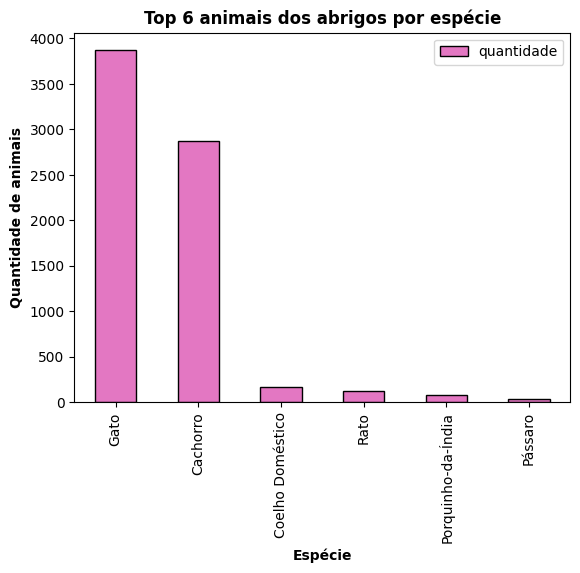

In [37]:
# Montando o gráfico

df_animais.head(6).plot(kind="bar", x='nome da espécie', y='quantidade', color="tab:pink", edgecolor = 'black')

plt.xlabel('Espécie', fontweight='bold')
plt.ylabel('Quantidade de animais', fontweight='bold')
plt.title('Top 6 animais dos abrigos por espécie', fontweight='bold')

plt.show()

#### Criando um dataframe filtrado de gato pra usar nas análises

In [38]:
# Dataframe só da espécie gato

df_gatos = df_abrigo[df_abrigo['nome da espécie'] == 'Gato']
df_gatos

,id,data de entrada,motivo de entrada,é transferência,código do abrigo,nome do animal,nome da raça,cor base,nome da espécie,sexo,data de movimentação,tipo de movimentação,data de retorno,motivo de retorno,data de falecimento,motivo de falecimento,morreu fora do abrigo,foi sacrificado,é DOA,idade (anos)
0,15801,2009-11-28 00:00:00,Mudança,0,C09115463,Jadzia,Doméstico de Pelo Curto,Escama de tartaruga,Gato,Fêmea,2017-05-13,Adoção,NaT,Animal de rua,NaT,Falecido sob cuidados,0,0,0,9.166667
3,30812,2013-01-11 00:00:00,Abandonado,0,C1301091,Pretty Girl,Doméstico de Pelo Curto,Escama de tartaruga diluída,Gato,Fêmea,2017-04-18,Lar temporário,2018-05-29,Animal de rua,NaT,Falecido sob cuidados,0,0,0,8.091667
4,30812,2013-01-11 00:00:00,Abandonado,0,C1301091,Pretty Girl,Doméstico de Pelo Curto,Escama de tartaruga diluída,Gato,Fêmea,2018-05-29,Adoção,NaT,Animal de rua,NaT,Falecido sob cuidados,0,0,0,8.091667
12,46437,2016-10-26 00:00:00,Abandonado,0,C16103406,Nova,Doméstico de Pelo Longo,Preto,Gato,Fêmea,2017-03-25,Lar temporário,2017-04-07,Animal de rua,2018-02-10,"Incurável, incontrolável",0,1,0,12.250000
13,46437,2016-10-26 00:00:00,Abandonado,0,C16103406,Nova,Doméstico de Pelo Longo,Preto,Gato,Fêmea,2017-04-07,Adoção,2018-02-09,Incompatível com o estilo de vida do dono,2018-02-10,"Incurável, incontrolável",0,1,0,12.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10280,64564,2019-08-26 15:33:00,Perdido/sem dono,0,C19081412,Kitty M,Doméstico de Pelo Curto,Escama de tartaruga,Gato,Fêmea,2019-08-30,Reivindicado,NaT,Animal de rua,NaT,Ordem judicial/Legal,0,0,0,3.000000
10283,64574,2019-08-26 16:48:35,Desistência de ninhada,0,C19081422,Maeve,Doméstico de Pelo Curto,Tigrado e Calico,Gato,Fêmea,2019-08-30,Adoção,NaT,Animal de rua,NaT,Ordem judicial/Legal,0,0,0,6.000000
10284,64582,2019-08-27 16:12:00,Alergias,0,C19081427,Whiskers,Doméstico de Pelo Curto,Cinza,Gato,Macho,2019-08-30,Adoção,NaT,Animal de rua,NaT,Ordem judicial/Legal,0,0,0,0.307692
10285,64584,2019-08-27 16:52:09,Desistência de ninhada,0,C19081429,Max,Doméstico de Pelo Médio,Laranja e Branco,Gato,Macho,2019-08-29,Adoção,NaT,Animal de rua,NaT,Ordem judicial/Legal,0,0,0,0.403846


##### Modificando a coluna 'idade (anos)'

In [39]:
# Criando função para classificar as idades dos animais

def animalageClassification(idade):
  if idade <= 1:
        return 'Filhote'
  elif 1 < idade <= 3:
        return 'Jovem'
  elif 3 < idade <= 7:
        return 'Adulto'
  else:
        return 'Idoso'

In [40]:
# Aplicando função na coluna

df_gatos['classificacao da idade'] = df_gatos['idade (anos)'].apply(animalageClassification)

<ipython-input-40-635d5739eb8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gatos['classificacao da idade'] = df_gatos['idade (anos)'].apply(animalageClassification)


In [41]:
# Verificando mudança
df_gatos

,id,data de entrada,motivo de entrada,é transferência,código do abrigo,nome do animal,nome da raça,cor base,nome da espécie,sexo,...,tipo de movimentação,data de retorno,motivo de retorno,data de falecimento,motivo de falecimento,morreu fora do abrigo,foi sacrificado,é DOA,idade (anos),classificacao da idade
0,15801,2009-11-28 00:00:00,Mudança,0,C09115463,Jadzia,Doméstico de Pelo Curto,Escama de tartaruga,Gato,Fêmea,...,Adoção,NaT,Animal de rua,NaT,Falecido sob cuidados,0,0,0,9.166667,Idoso
3,30812,2013-01-11 00:00:00,Abandonado,0,C1301091,Pretty Girl,Doméstico de Pelo Curto,Escama de tartaruga diluída,Gato,Fêmea,...,Lar temporário,2018-05-29,Animal de rua,NaT,Falecido sob cuidados,0,0,0,8.091667,Idoso
4,30812,2013-01-11 00:00:00,Abandonado,0,C1301091,Pretty Girl,Doméstico de Pelo Curto,Escama de tartaruga diluída,Gato,Fêmea,...,Adoção,NaT,Animal de rua,NaT,Falecido sob cuidados,0,0,0,8.091667,Idoso
12,46437,2016-10-26 00:00:00,Abandonado,0,C16103406,Nova,Doméstico de Pelo Longo,Preto,Gato,Fêmea,...,Lar temporário,2017-04-07,Animal de rua,2018-02-10,"Incurável, incontrolável",0,1,0,12.250000,Idoso
13,46437,2016-10-26 00:00:00,Abandonado,0,C16103406,Nova,Doméstico de Pelo Longo,Preto,Gato,Fêmea,...,Adoção,2018-02-09,Incompatível com o estilo de vida do dono,2018-02-10,"Incurável, incontrolável",0,1,0,12.250000,Idoso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10280,64564,2019-08-26 15:33:00,Perdido/sem dono,0,C19081412,Kitty M,Doméstico de Pelo Curto,Escama de tartaruga,Gato,Fêmea,...,Reivindicado,NaT,Animal de rua,NaT,Ordem judicial/Legal,0,0,0,3.000000,Jovem
10283,64574,2019-08-26 16:48:35,Desistência de ninhada,0,C19081422,Maeve,Doméstico de Pelo Curto,Tigrado e Calico,Gato,Fêmea,...,Adoção,NaT,Animal de rua,NaT,Ordem judicial/Legal,0,0,0,6.000000,Adulto
10284,64582,2019-08-27 16:12:00,Alergias,0,C19081427,Whiskers,Doméstico de Pelo Curto,Cinza,Gato,Macho,...,Adoção,NaT,Animal de rua,NaT,Ordem judicial/Legal,0,0,0,0.307692,Filhote
10285,64584,2019-08-27 16:52:09,Desistência de ninhada,0,C19081429,Max,Doméstico de Pelo Médio,Laranja e Branco,Gato,Macho,...,Adoção,NaT,Animal de rua,NaT,Ordem judicial/Legal,0,0,0,0.403846,Filhote


##### Baixando o dataframe gatos em CSV

In [74]:
# Baixando o dataframe limpo do abrigo para CSV

df_gatos.to_csv('animal_abrigo_gatos.csv', index=False)

#### Filtrando os gatos por IDs únicos

In [43]:
# Filtrando apenas os IDs únicos antes de contar
df_unicosgatos = df_gatos.drop_duplicates(subset='id')

#### Analisando as raças dos gatos

In [44]:
# Analisando a raças dos gatos do abrigo

df_raca_gato = df_unicosgatos['nome da raça'].value_counts().reset_index(name='quantidade')
df_raca_gato

,nome da raça,quantidade
0,Doméstico de Pelo Curto,3158
1,Doméstico de Pelo Médio,285
2,Doméstico de Pelo Longo,249
3,SRD,28
4,Siamês,25
5,Manx,20
6,Siamese/Domestic Short Hair,12
7,Manx/Domestic Short Hair,8
8,Maine Coon,8
9,Bengal,7


##### Gráfico raça dos gatos

<br>
<div class="alert alert-block alert-info">
<b>Raça Doméstico de Pelo Curto:</b> Esta raça representa 81,60% dos gatinhos. O gráfico abaixo visa analisar a ocorrência das demais raças no abrigo.
</div>

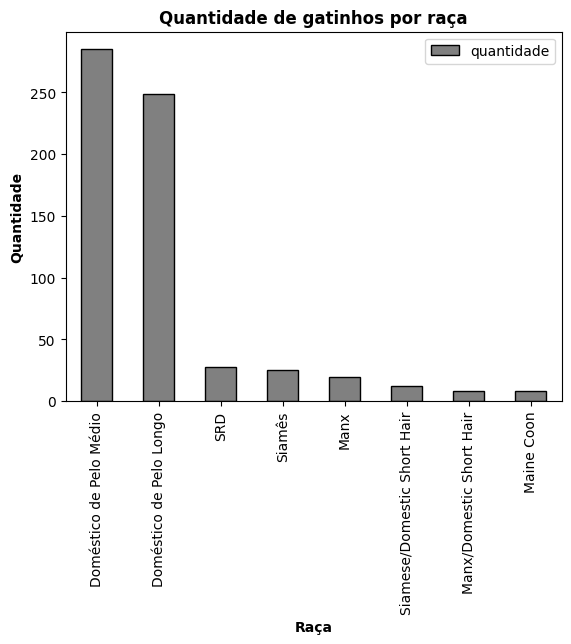

In [45]:
# Montando o gráfico

df_raca_gato[df_raca_gato['nome da raça'] != 'Doméstico de Pelo Curto'].head(8).plot(kind="bar", x='nome da raça', y='quantidade', color="gray", edgecolor = 'black')

plt.xlabel('Raça', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.title('Quantidade de gatinhos por raça', fontweight='bold')

plt.show()

#### Analisando as cores dos gatos

In [46]:
# Analisando a cores dos gatos do abrigo

df_cor_gato = df_unicosgatos['cor base'].value_counts().reset_index(name='quantidade')
df_cor_gato

,cor base,quantidade
0,Preto,631
1,Laranja,346
2,Cinza,339
3,Preto e Marrom,334
4,Preto e Branco,325
5,Escama de tartaruga,227
6,Cinza e Branco,186
7,Marrom e Preto,174
8,Laranja e Branco,159
9,Calico,128


##### Gráfico cor dos gatos

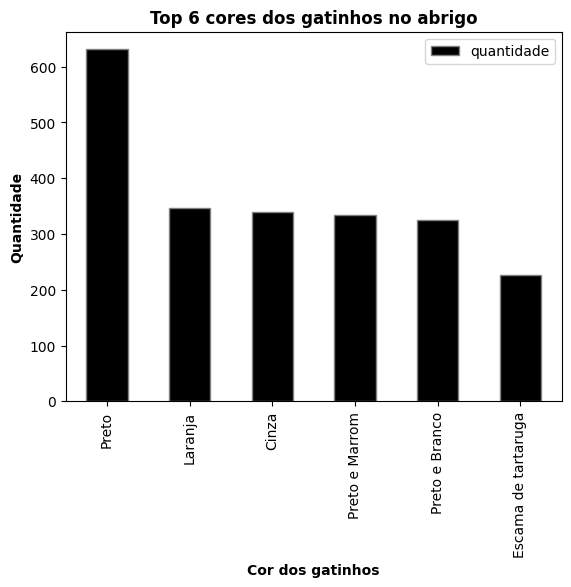

In [47]:
# Montando o gráfico

df_cor_gato.head(6).plot(kind="bar", x='cor base', y='quantidade', color="black", edgecolor = 'gray')

plt.xlabel('Cor dos gatinhos', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.title('Top 6 cores dos gatinhos no abrigo', fontweight='bold')

plt.show()

#### Analisando as idades dos gatos

In [48]:
df_idade_gato = df_unicosgatos['classificacao da idade'].value_counts().reset_index(name='quantidade')
df_idade_gato

,classificacao da idade,quantidade
0,Jovem,1502
1,Filhote,1029
2,Adulto,830
3,Idoso,509


##### Gráfico idade dos gatos

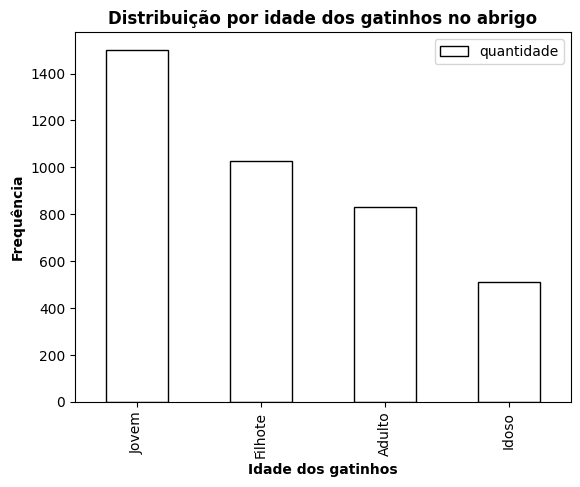

In [49]:
# Montando o gráfico

df_idade_gato.head(6).plot(kind="bar", x='classificacao da idade', y='quantidade', color="white", edgecolor = 'black')

plt.xlabel('Idade dos gatinhos', fontweight='bold')
plt.ylabel('Frequência', fontweight='bold')
plt.title('Distribuição por idade dos gatinhos no abrigo', fontweight='bold')

plt.show()

### Análise exploratória - Parte II

#### 1- Analisando o motivo de entrada dos gatos

In [50]:
#Analisando o motivo de entrada dos gatos no abrigo

df_motivoentrada_gato = df_gatos['motivo de entrada'].value_counts().reset_index(name='quantidade')
df_motivoentrada_gato

,motivo de entrada,quantidade
0,Perdido/sem dono,2902
1,Desistência de ninhada,848
2,Incompatível com o estilo de vida do proprietário,624
3,Acomodação inadequada,224
4,Mudança,199
5,Incapaz de arcar com custos,185
6,Abandonado,170
7,Nascido no abrigo,136
8,Proprietário falecido,79
9,Doente/Ferido,79


##### Gráfico: Top 6 principais motivos de entrada no abrigo (gatos)

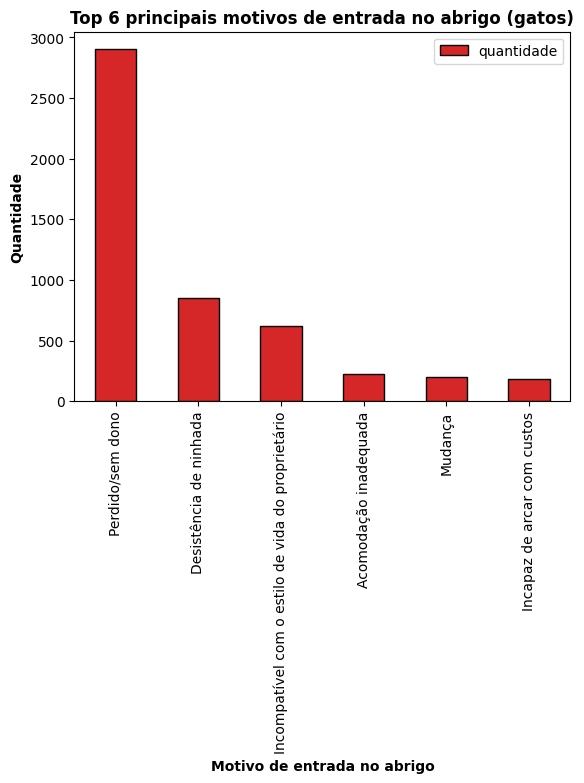

In [51]:
#Gráfico

# Montando o gráfico

df_motivoentrada_gato.head(6).plot(kind="bar", x='motivo de entrada', y='quantidade', color="tab:red", edgecolor = 'black')

plt.xlabel('Motivo de entrada no abrigo', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.title('Top 6 principais motivos de entrada no abrigo (gatos)', fontweight='bold')

plt.show()

#### 2- Analisando a sazonalidade de entrada dos gatinhos no abrigo

In [52]:
# Sazonalidade de entrada no abrigo por mês

df_mes_entrada = df_gatos['data de entrada'].dt.month.value_counts().sort_index().reset_index(name='quantidade')
df_mes_entrada

,data de entrada,quantidade
0,1,218
1,2,151
2,3,282
3,4,469
4,5,828
5,6,964
6,7,781
7,8,641
8,9,487
9,10,419


##### Gráfico: Sazonalidade (mês) de entrada de gatinhos no abrigo

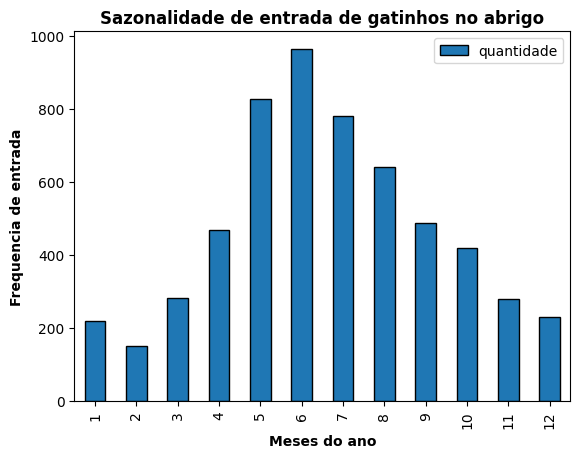

In [53]:
# Montando o gráfico

df_mes_entrada.plot(kind= 'bar', x= 'data de entrada', y= 'quantidade', color="tab:blue", edgecolor = 'black')

plt.xlabel('Meses do ano', fontweight='bold')
plt.ylabel('Frequencia de entrada', fontweight='bold')
plt.title('Sazonalidade de entrada de gatinhos no abrigo', fontweight='bold')

plt.show()

#### 3- Analisando o tempo de permanência (dias)

In [54]:
# Criando a coluna tempo de permanência no abrigo em dias

df_gatos['tempo permanencia dias'] = (df_gatos['data de movimentação'] - df_gatos['data de entrada']).dt.days
df_gatos


<ipython-input-54-d978fc76348c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gatos['tempo permanencia dias'] = (df_gatos['data de movimentação'] - df_gatos['data de entrada']).dt.days


,id,data de entrada,motivo de entrada,é transferência,código do abrigo,nome do animal,nome da raça,cor base,nome da espécie,sexo,...,data de retorno,motivo de retorno,data de falecimento,motivo de falecimento,morreu fora do abrigo,foi sacrificado,é DOA,idade (anos),classificacao da idade,tempo permanencia dias
0,15801,2009-11-28 00:00:00,Mudança,0,C09115463,Jadzia,Doméstico de Pelo Curto,Escama de tartaruga,Gato,Fêmea,...,NaT,Animal de rua,NaT,Falecido sob cuidados,0,0,0,9.166667,Idoso,2723
3,30812,2013-01-11 00:00:00,Abandonado,0,C1301091,Pretty Girl,Doméstico de Pelo Curto,Escama de tartaruga diluída,Gato,Fêmea,...,2018-05-29,Animal de rua,NaT,Falecido sob cuidados,0,0,0,8.091667,Idoso,1558
4,30812,2013-01-11 00:00:00,Abandonado,0,C1301091,Pretty Girl,Doméstico de Pelo Curto,Escama de tartaruga diluída,Gato,Fêmea,...,NaT,Animal de rua,NaT,Falecido sob cuidados,0,0,0,8.091667,Idoso,1964
12,46437,2016-10-26 00:00:00,Abandonado,0,C16103406,Nova,Doméstico de Pelo Longo,Preto,Gato,Fêmea,...,2017-04-07,Animal de rua,2018-02-10,"Incurável, incontrolável",0,1,0,12.250000,Idoso,150
13,46437,2016-10-26 00:00:00,Abandonado,0,C16103406,Nova,Doméstico de Pelo Longo,Preto,Gato,Fêmea,...,2018-02-09,Incompatível com o estilo de vida do dono,2018-02-10,"Incurável, incontrolável",0,1,0,12.250000,Idoso,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10280,64564,2019-08-26 15:33:00,Perdido/sem dono,0,C19081412,Kitty M,Doméstico de Pelo Curto,Escama de tartaruga,Gato,Fêmea,...,NaT,Animal de rua,NaT,Ordem judicial/Legal,0,0,0,3.000000,Jovem,3
10283,64574,2019-08-26 16:48:35,Desistência de ninhada,0,C19081422,Maeve,Doméstico de Pelo Curto,Tigrado e Calico,Gato,Fêmea,...,NaT,Animal de rua,NaT,Ordem judicial/Legal,0,0,0,6.000000,Adulto,3
10284,64582,2019-08-27 16:12:00,Alergias,0,C19081427,Whiskers,Doméstico de Pelo Curto,Cinza,Gato,Macho,...,NaT,Animal de rua,NaT,Ordem judicial/Legal,0,0,0,0.307692,Filhote,2
10285,64584,2019-08-27 16:52:09,Desistência de ninhada,0,C19081429,Max,Doméstico de Pelo Médio,Laranja e Branco,Gato,Macho,...,NaT,Animal de rua,NaT,Ordem judicial/Legal,0,0,0,0.403846,Filhote,1


##### Analisando a tendência de permanência no abrigo

In [55]:
# Média em dias

print(f"A média de permanência no abrigo é de {np.mean(df_gatos['tempo permanencia dias']):.2f} dias")

A média de permanência no abrigo é de 33.74 dias


In [56]:
# Maior número de dias no abrigo

print(f"{np.max(df_gatos['tempo permanencia dias'])} foi o maior número de dias que um gatinho ficou no abrigo")


2723 foi o maior número de dias que um gatinho ficou no abrigo


In [57]:
# Encontrando a moda

moda = stats.mode(df_gatos['tempo permanencia dias'])

print(f"A tendência são os gatinhos ficarem no abrigo por {moda.mode} dias, De 3870, {moda.count} permaneceram no abrigo por esse número de dias")


A tendência são os gatinhos ficarem no abrigo por 0 dias, De 3870, 334 permaneceram no abrigo por esse número de dias


##### Gráfico da tendência de permanência no abrigo

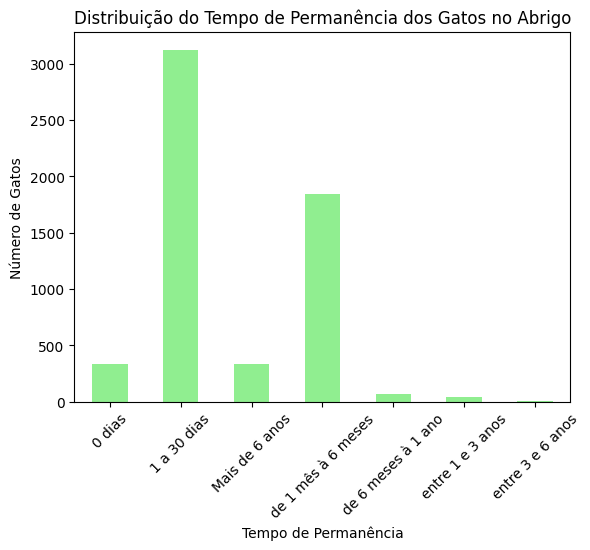

In [58]:
# Função para classificar os intervalos de permanência
def classificar_permanencia(dias):
    if dias == 0:
        return '0 dias'
    elif 1 <= dias <= 30:
        return '1 a 30 dias'
    elif 31 <= dias <= 180:
        return 'de 1 mês à 6 meses'
    elif 181 <= dias <= 365:
        return 'de 6 meses à 1 ano'
    elif 366 <= dias <= 1095:
        return 'entre 1 e 3 anos'
    elif 1096 <= dias <= 2190:
        return 'entre 3 e 6 anos'
    else:
        return 'Mais de 6 anos'

# Aplicando a função no gráfico sem criar uma nova coluna
df_gatos['tempo permanencia dias'].apply(classificar_permanencia).value_counts().sort_index().plot(
    kind='bar', color='lightgreen')

# Configurando o gráfico
plt.title('Distribuição do Tempo de Permanência dos Gatos no Abrigo')
plt.xlabel('Tempo de Permanência')
plt.ylabel('Número de Gatos')
plt.xticks(rotation=45)
plt.show()


#### 4- Analisando os motivos de movimentação (saída do abrigo)

In [59]:
# Moda: Quais motivos de movimentação imediata?

df_moda = df_gatos[df_gatos['tempo permanencia dias'] == 0]
df_moda = df_moda['tipo de movimentação'].value_counts().reset_index(name='quantidade')
df_moda

,tipo de movimentação,quantidade
0,Lar temporário,246
1,Transferência,45
2,Reivindicado,42
3,Adoção,1


In [60]:
# Geral: Analisando os tipos de movimentação e suas quantidades

df_geral = df_gatos['tipo de movimentação'].value_counts().reset_index(name='quantidade')
df_geral

,tipo de movimentação,quantidade
0,Adoção,3241
1,Lar temporário,1939
2,Transferência,304
3,Reivindicado,254
4,Roubado,6
5,Liberado na natureza,4
6,Fugiu,1


In [61]:
# Entendendo o total de animais que saem do abrigo

total_animais_saida = df_geral['quantidade'].sum()

# Exibindo o total
print(f"Quantidade total de animais que saem do abrigo: {total_animais_saida}")

Quantidade total de animais que saem do abrigo: 5749


##### Gráficos sobre movimentação

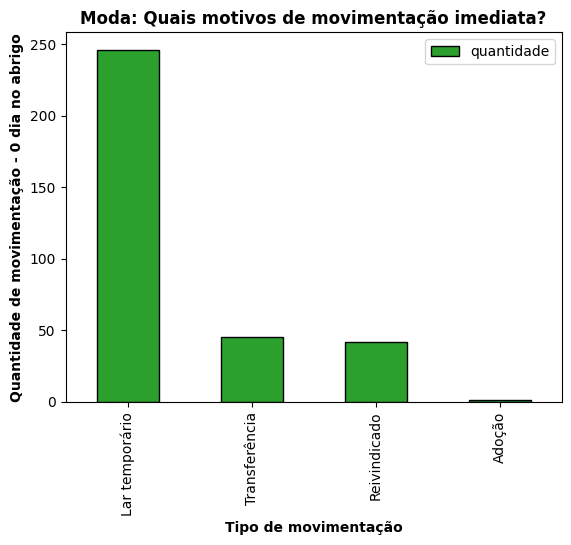

In [62]:
# Montando o gráfico "Moda: Quais motivos de movimentação imediata?"

df_moda.plot(kind="bar", x='tipo de movimentação', y='quantidade', color="tab:green", edgecolor = 'black')

plt.xlabel('Tipo de movimentação', fontweight='bold')
plt.ylabel('Quantidade de movimentação - 0 dia no abrigo', fontweight='bold')
plt.title('Moda: Quais motivos de movimentação imediata?', fontweight='bold')

plt.show()

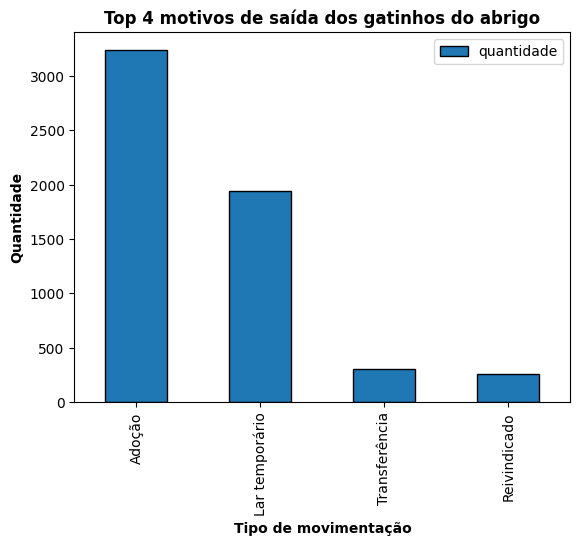

In [63]:
# Montando o gráfico dos tipos de movimentação

df_geral.head(4).plot(kind="bar", x='tipo de movimentação', y='quantidade', color="tab:blue", edgecolor = 'black')

plt.xlabel('Tipo de movimentação', fontweight='bold')
plt.ylabel('Quantidade', fontweight='bold')
plt.title('Top 4 motivos de saída dos gatinhos do abrigo', fontweight='bold')

plt.show()

#### 5- Analisando a sazonalidade de adoação dos gatinhos no abrigo

In [64]:
# Sazonalidade de adoação no abrigo por mês

df_mes_adoção = df_gatos['data de entrada'].dt.month.value_counts().sort_index().reset_index(name='quantidade')
df_mes_entrada

,data de entrada,quantidade
0,1,218
1,2,151
2,3,282
3,4,469
4,5,828
5,6,964
6,7,781
7,8,641
8,9,487
9,10,419


In [65]:
# Filtrando apenas as linhas onde o tipo de movimentação é 'Adoção'
df_adoções = df_gatos[df_gatos['tipo de movimentação'] == 'Adoção']

# Contando a quantidade de adoções por mês
df_mes_adocao = df_adoções['data de movimentação'].dt.month.value_counts().sort_index().reset_index(name='quantidade')

# Verificando
df_mes_adocao


,data de movimentação,quantidade
0,1,187
1,2,131
2,3,131
3,4,156
4,5,207
5,6,393
6,7,470
7,8,565
8,9,271
9,10,258


##### Gráfico: Sazonalidade (mês) de saída por adoação de gatinhos no abrigo

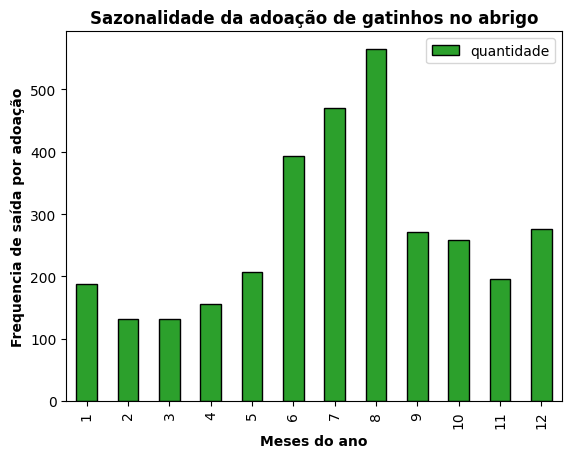

In [66]:
# Montando o gráfico

df_mes_adocao.plot(kind= 'bar', x= 'data de movimentação', y= 'quantidade', color="tab:green", edgecolor = 'black')

plt.xlabel('Meses do ano', fontweight='bold')
plt.ylabel('Frequencia de saída por adoação', fontweight='bold')
plt.title('Sazonalidade da adoação de gatinhos no abrigo', fontweight='bold')

plt.show()

#### 6- Analisando o motivo de retorno dos gatos para os abrigos

In [67]:
# Entendendo o total de animais que retornam através da coluna 'motivo de retorno'

df_retorno = df_gatos['motivo de retorno'].value_counts().reset_index(name='quantidade')
total_animais_retorno = df_retorno['quantidade'].sum()

# Exibindo o total
print(f"Quantidade total de animais que retornam: {total_animais_retorno}")

Quantidade total de animais que retornam: 5749


In [68]:
# Analisando os motivos de retorno dos gatos

df_retorno

,motivo de retorno,quantidade
0,Animal de rua,5531
1,Incompatível com o estilo de vida do dono,91
2,Mudança de residência,24
3,Incompatível com outros animais,18
4,Alergias,17
5,Acomodação inadequada,12
6,Devolução por comportamento,7
7,Doente/ferido,7
8,Devolução por incompatibilidade com estilo de ...,6
9,Devolução por outro motivo,6


In [69]:
# Verificando quantas linhas possuem informação em 'data de retorno'

df_gatos['data de retorno'].notna().sum()

2067

In [70]:
# Calcular a quantidade de IDs únicos na coluna 'data de retorno' (sem NaN)
quantidade_unicos = df_gatos['id'][df_gatos['data de retorno'].notna()].nunique()

print("Quantidade de gatos que retornaram ao abrigo:", quantidade_unicos)


Quantidade de gatos que retornaram ao abrigo: 1634


In [71]:
# Analisando os motivos de retorno dos gatos que realmente retornaram

df_retorno_validos = df_gatos[df_gatos['data de retorno'].notna()]

df_retorno = df_retorno_validos['motivo de retorno'].value_counts().reset_index(name='quantidade')

df_retorno



,motivo de retorno,quantidade
0,Animal de rua,1852
1,Incompatível com o estilo de vida do dono,91
2,Mudança de residência,23
3,Incompatível com outros animais,18
4,Alergias,17
5,Acomodação inadequada,12
6,Devolução por comportamento,7
7,Doente/ferido,7
8,Devolução por incompatibilidade com estilo de ...,6
9,Devolução por outro motivo,6


##### Gráfico de retorno dos gatos ao abrigo sem o motivo "animal de rua"



<br>
<div class="alert alert-block alert-info">
<b>Motivo 'Animais de rua':</b> representam 89,59% do motivo de retorno ao abrigo.
</div>

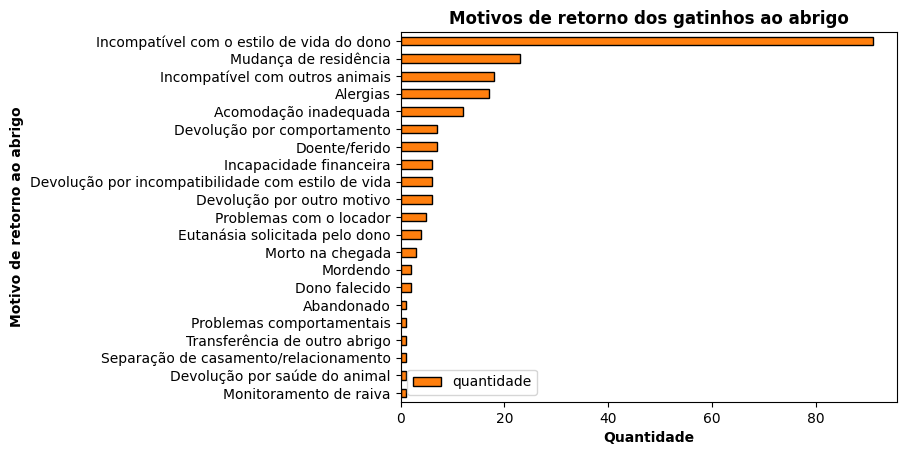

In [72]:
df_retorno[df_retorno['motivo de retorno'] != 'Animal de rua'].sort_values(by='quantidade', ascending=True).plot(kind="barh", x='motivo de retorno', y='quantidade', color="tab:orange", edgecolor = 'black')

plt.xlabel('Quantidade', fontweight='bold')
plt.ylabel('Motivo de retorno ao abrigo', fontweight='bold')
plt.title('Motivos de retorno dos gatinhos ao abrigo', fontweight='bold')

plt.show()

## Mini Relatório



*   **Objetivo:**

  Analisar a movimentação de gatos nos abrigos (entrada e saída), compreendendo a situação dos abandonos, tempo de permanência no abrigo, motivo de saída do abrigo e verificando se há alguma co-relação com cor e idade.

<br>


*   **Os dados:**
  * O período de coleta foi de 2017 e 2020
  * 7288 abrigos participaram dessa base de dados
  * 27 espécies passaram pelos abrigos, totalizando 7288 animais

<br>

* **Os gatos:**
  * 3870 gatos foram recebidos nos abrigos, representando ***53,10% do total de animais***

  * ***Cor:*** Gatos pretos representam 16,30% do total, enquanto a segunda maior porcentagem são de laranjas representando 8,9% do total.
  *   * ***Idade:*** A maioria dos gatos dos abrigos são jovens, representando 38,8%. Seguido dos filhotes, representando 26,58%.

  * ***Entrada no abrigo:***
    * 50,47% do motivo de entrada é por não possuirem tutores ou estarem perdidos.

    * *Sazonalidade:* O período de maior entrada de gatinhos no abrigo é de maio à agosto, com pico em junho. Esses são meses de férias escolares/de verão nos Estados Unidos.

  * ***Permanência e saída do abrigo:***
    * 100% dos gatos saem do abrigo em algum momento
      * Há 7 motivos registrados para saída: Adoção, Lar temporário, Transferência, Reivindicado, Roubado, Liberado na natureza, Fugiu

    * A média de permanência é de 34 dias
      * A adoção é o principal motivo de movimentação, representando 56,37% dos casos de saída do abrigo

    * *Sazonalidade:* Apesar de representar apenas 5% do total, a tendência (moda) são os gatos sairem do abrigo no mesmo dia de entrada.
      * Nestes casos, o lar temporário é o principal motivo de saída
      * O período de maior saída por adoação dos gatinhos é no mês de agosto. Esse é o período de fim de férias escolares/de verão nos Estados Unidos.

    * Ainda assim, 2723 dias, ou seja, entorno de 7 anos, foi o maior tempo que um gatinho ficou no abrigo

  * ***Retorno dos gatos ao abrigo:***
    * 1634 retornaram ao abrigo uma ou mais vezes
    * A coluna 'motivo de retorno' indicaria que 100% dos gatos teriam retornado aos abrigos. No entanto, nem todos os gatos possuiam informação da data de retorno preenchida. Com isso, foi filtrado apenas as colunas preenchidas em 'data de retorno', e depois excluído os IDs duplicados, para entender a quantidade de animais que retornoram ao abrigo

    * Motivo 'Animais de rua' representam 89,59% do motivo de retorno ao abrigo. Indicando que esses animais possivelmente foram abandonados ou fugiram dos locais de acolhimento.

*   **Conclusão**







